# RBM-BB 

In [4]:
prjttl = 'BBRBM_MNIST_100h'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [6]:
data_dir = '../../../paperstudy/RBM/datas/'

In [7]:
sys.path.append('../')
import RBM as rbm

## Load data

In [8]:
mnist_train_data = data_dir + "mnist_train.csv"
mnist_test_data = data_dir + "mnist_test.csv"

training_data_file = open(mnist_train_data, 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

test_data_file = open(mnist_test_data, 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [9]:
# number of data
print('number of training data', len(training_data_list))
print('number of test data', len(test_data_list))

number of training data 60000
number of test data 10000


## Preprocessing

In [10]:
n_data_train = 1000
n_data_val = 500
n_data_test = 500

n_x = 784 # input vector size

x_train = np.zeros((n_data_train, n_x))
for i, data in enumerate(training_data_list[:n_data_train]):
    data = data.split(',')
    x_train[i] = np.asfarray(data[1:])/255.
    
x_val = np.zeros((n_data_val, n_x))
for i, data in enumerate(training_data_list[n_data_train:n_data_train+n_data_val]):
    data = data.split(',')
    x_val[i] = np.asfarray(data[1:])/255.
    
x_test = np.zeros((n_data_test, n_x))
for i, data in enumerate(test_data_list[:n_data_test]):
    data = data.split(',')
    x_test[i] = np.asfarray(data[1:])/255.

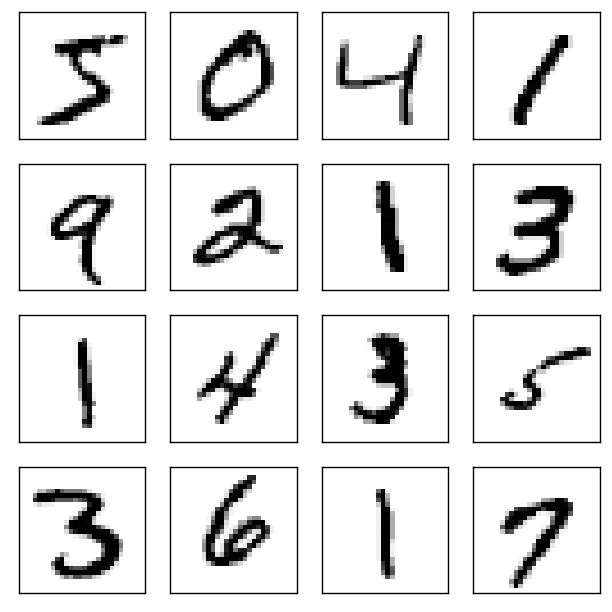

In [11]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

## Define RBM

In [8]:
model = rbm.RBM(n_x,10)

In [9]:
model.fit(x_train,0.1,50)

0 0.48113694026630266
1 0.4729093842438938
2 0.46501258052240535
3 0.4570370503103202
4 0.4493316931674631
5 0.441922524499996
6 0.4342677575932333
7 0.4278520713187235
8 0.4214237149761866
9 0.41442496547638663
10 0.40704758952600656
11 0.40232325979411393
12 0.396546399049816
13 0.39001082982212504
14 0.3841990050922329
15 0.3803102495900321
16 0.3738339440678232
17 0.3684457437877112
18 0.36412967235913984
19 0.35985401709703496
20 0.35507870697298527
21 0.3503476145360106
22 0.3450507808025171
23 0.3409470092939135
24 0.3379357597941138
25 0.33376199528831135
26 0.3297785218989557
27 0.32607430021028017
28 0.32352516555641864
29 0.31980160113064837
30 0.3152039370650222
31 0.3122559578733454
32 0.30840109092656665
33 0.3043690981294479
34 0.29840125099059245
35 0.2926459688777473
36 0.286626936264702
37 0.27807789664885557
38 0.27178617996218096
39 0.2647470443079192
40 0.2581927025712245
41 0.25275271657682674
42 0.24579072177890762
43 0.2416734248601401
44 0.23662659112664675
45 

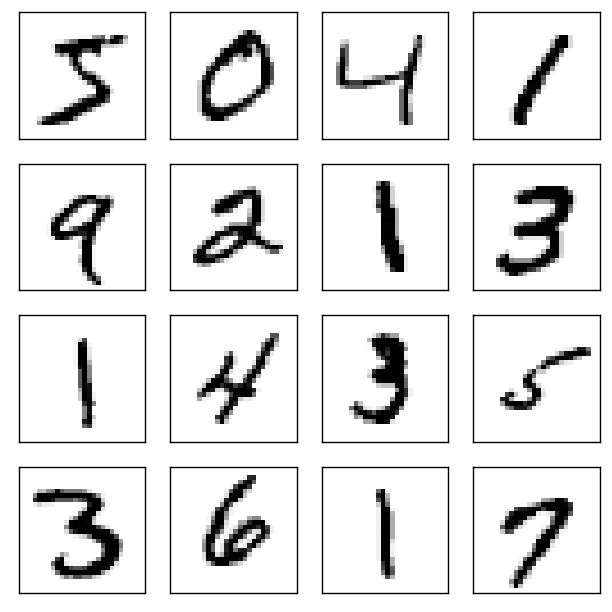

In [10]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

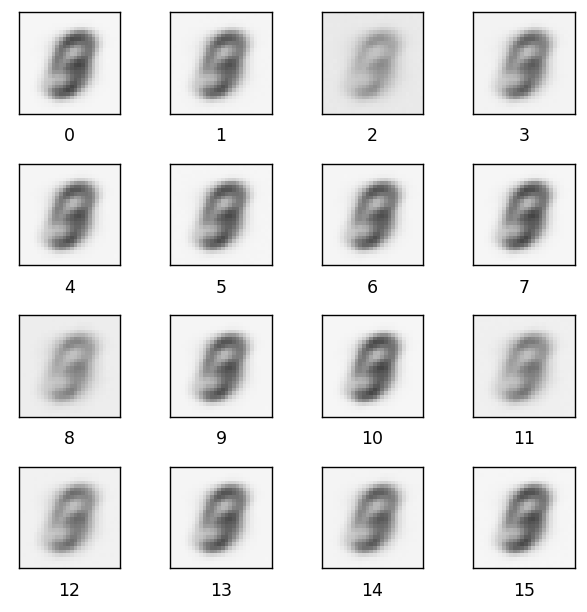

In [11]:
pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [12]:
model.w.T[0].shape

(784,)

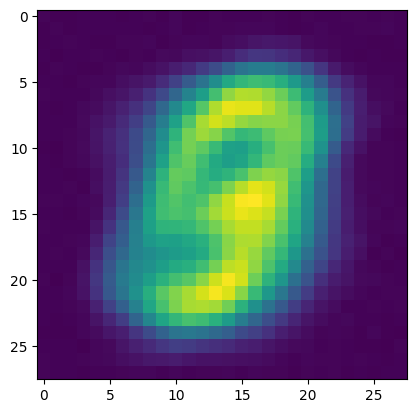

In [13]:
plt.imshow((hid[6]@model.w.T + model.a).reshape(28,28))

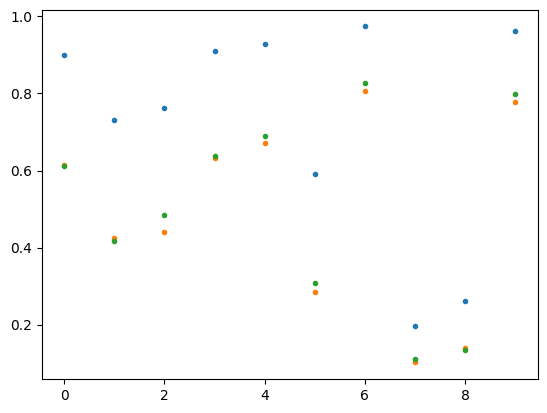

In [14]:
x = np.arange(10)
# plt.hist(hid[8])
plt.plot(x,hid[6],'.')
plt.plot(x,hid[8],'.')
plt.plot(x,hid[14],'.')

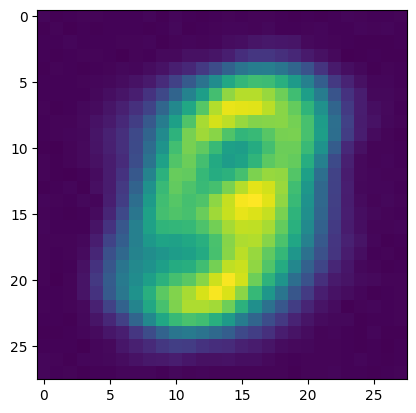

In [15]:
plt.imshow((hid[5]@model.w.T + model.a).reshape(28,28))

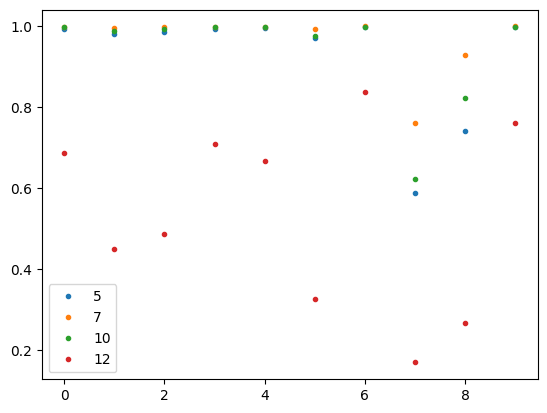

In [16]:
x = np.arange(10)
plt.plot(x,hid[5],'.',label='5')
plt.plot(x,hid[7],'.',label='7')
plt.plot(x,hid[10],'.',label='10')
plt.plot(x,hid[12],'.',label='12')
plt.legend()

In [17]:
model.w.shape

(784, 10)

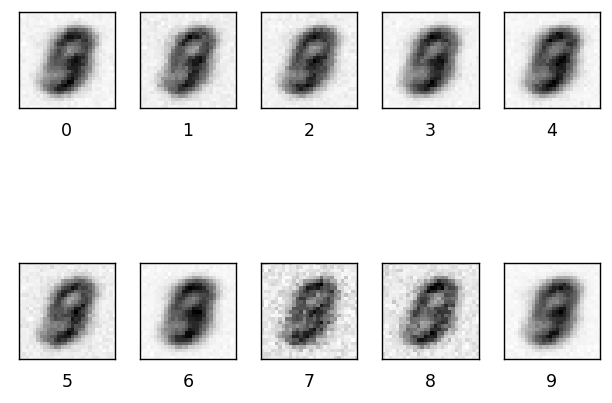

In [18]:
# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [19]:
np.log(784)

6.664409020350408

In [20]:
hid[0]

array([0.98647251, 0.94993265, 0.96241966, 0.9890926 , 0.99128117,
       0.92326021, 0.99663758, 0.45330746, 0.70227092, 0.99567364])

In [21]:
model.w

array([[-0.13337762, -0.09691056, -0.09246115, ..., -0.01740312,
        -0.05222447, -0.16605038],
       [-0.13239675, -0.09681271, -0.11637594, ..., -0.02606872,
        -0.06996896, -0.15729413],
       [-0.12873775, -0.10805851, -0.10460641, ..., -0.04654056,
        -0.02949776, -0.15612066],
       ...,
       [-0.14284108, -0.10646135, -0.09077376, ..., -0.04356276,
        -0.06391161, -0.16477797],
       [-0.12474987, -0.10654909, -0.09938958, ..., -0.04091152,
        -0.04972929, -0.15390193],
       [-0.11616807, -0.09604046, -0.11755376, ..., -0.02581435,
        -0.05303849, -0.15334655]])

# Feature retrieving

0 0.4817867651962745
1 0.4721497253803483
2 0.4654744452683034
3 0.4569250054923932
4 0.45046052470007597


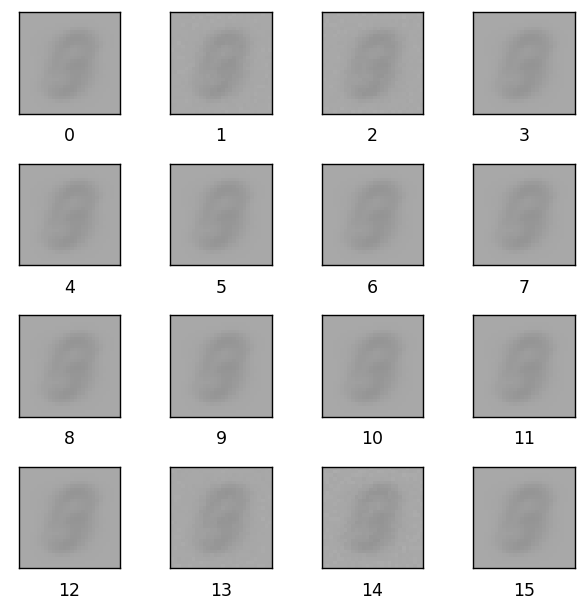

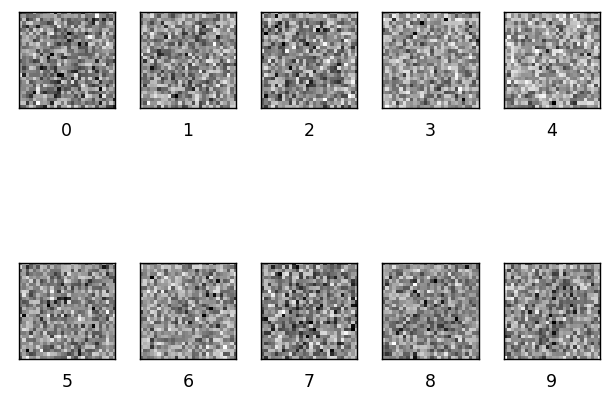

In [22]:
# Not trained

model = rbm.RBM(n_x,10)
model.fit(x_train,0.1,5)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

In [3]:
# Mid trained

model = rbm.RBM(n_x,10)
model.fit(x_train,0.1,200)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# Not all patterns are learned

NameError: name 'rbm' is not defined

0 0.4810665921270468
1 0.4716456937677033
2 0.4647800275011964
3 0.4554540721190438
4 0.4496448484295679
5 0.4410830987296879
6 0.4345704086536574
7 0.4282218242198841
8 0.4190282317829092
9 0.4137490100942338
10 0.40671569676890357
11 0.40038575479211297
12 0.3947433878453343
13 0.38890829380771924
14 0.38357201929791523
15 0.3777028916468549
16 0.37303182822148473
17 0.3668730046920729
18 0.3626450485095999
19 0.35645709332752706
20 0.3524956887657024
21 0.3478727896060385
22 0.34342854190695893
23 0.33848918616466195
24 0.33562257952200497
25 0.3299759058525371
26 0.3254681077332894
27 0.3195049274611807
28 0.31555665315145665
29 0.3099921673571388
30 0.30422021857762727
31 0.29646079480811927
32 0.2877355196980753
33 0.27958724038635063
34 0.27268871597658684
35 0.264939186164662
36 0.25772720637274527
37 0.25306809772928757
38 0.2465958338237255
39 0.24286546167486606
40 0.23822837684093243
41 0.23407016355561838
42 0.23116503150279716
43 0.22745223138274928
44 0.22424978040235702

350 0.09008273358362948
351 0.09033073278330941
352 0.09027482041836343
353 0.0900527415868308
354 0.09005401709703488
355 0.08975328680491808
356 0.08979436323549024
357 0.08960552269927578
358 0.08926261553641067
359 0.08990850889375353
360 0.08934698428390966
361 0.08929456331552232
362 0.08904600389175274
363 0.08946668216306132
364 0.08946641705701888
365 0.08909735443196885
366 0.08879540865365756
367 0.0890600545120009
368 0.08873232842156473
369 0.08837761653681082
370 0.08845389704901573
371 0.0886667521910725
372 0.08843815075049627
373 0.08843305371168073
374 0.08844019156682278
375 0.08866537163885163
376 0.08785780861364151
377 0.0880711139357704
378 0.08799904510823939
379 0.08811572678090844
380 0.08775320177090443
381 0.0875604396660625
382 0.08734528360363758
383 0.08734106191496202
384 0.08748114794937584
385 0.08743372898178879
386 0.08783799568847145
387 0.08685661313545026
388 0.08727147407982802
389 0.08724586883773118
390 0.08723737544037223
391 0.087162035304317

695 0.07037752650079639
696 0.07122980241116052
697 0.0706386459485755
698 0.0709147013707444
699 0.0707738450282074
700 0.07045770857362552
701 0.07064066175489805
702 0.07092779160683883
703 0.07045254650879962
704 0.07010822878170875
705 0.07005476239515415
706 0.07073266855761912
707 0.0706010659165627
708 0.07057355491216094
709 0.0704560579133614
710 0.07054783962604652
711 0.07011150509223298
712 0.07028483942596644
713 0.07032995747318538
714 0.07056446127470598
715 0.07015739344757513
716 0.07003299868967196
717 0.06995336183493009
718 0.06992772157882762
719 0.07008705531232103
720 0.07038887604061231
721 0.06977784162684685
722 0.07000370697298526
723 0.06996603690495809
724 0.06958977640075643
725 0.06992206431592246
726 0.06951784762924777
727 0.0696509058525371
728 0.06987841685693885
729 0.06952171417586642
730 0.06997000349159273
731 0.06936732742116454
732 0.06930014554841545
733 0.06955479240715895
734 0.06967282462004408
735 0.06934582381972398
736 0.0692446733595399

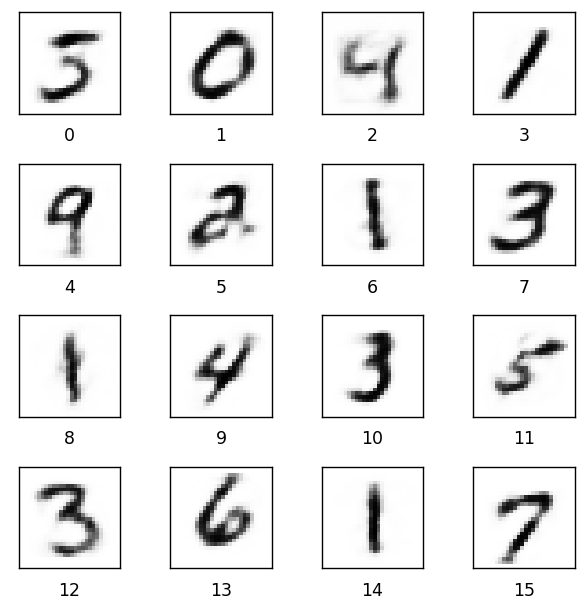

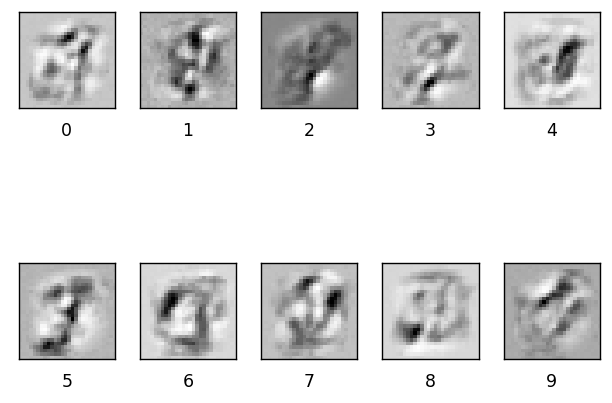

In [8]:
# Well trained

n_h = 100

model = rbm.RBM(n_x,n_h)
model.fit(x_train,0.1,1000)

pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(pred[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()
plt.show()

In [10]:
model.w

array([[-0.07994977, -0.0633587 , -0.24946978, ..., -0.1663789 ,
        -0.23160963, -0.08529326],
       [-0.11559113, -0.06793313, -0.26091464, ..., -0.17663907,
        -0.22760558, -0.07782317],
       [-0.08748472, -0.04456835, -0.24086916, ..., -0.19919881,
        -0.24164989, -0.08572561],
       ...,
       [-0.08628872, -0.06605983, -0.25993903, ..., -0.1913698 ,
        -0.22735157, -0.08622302],
       [-0.1034634 , -0.04872091, -0.24118429, ..., -0.19791907,
        -0.23320401, -0.09409507],
       [-0.09060356, -0.06098513, -0.26663824, ..., -0.18090931,
        -0.21843992, -0.09653035]])

In [11]:
np.sum(np.abs(model.w) > 1e-4)

78382

In [12]:
np.sum(np.abs(model.w) > 0)

78400

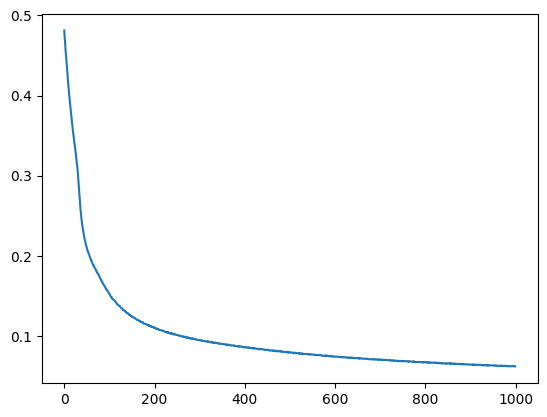

In [13]:
plt.plot(np.arange(len(model.history['loss'])), model.history['loss'])

In [14]:
w_hist = np.array(model.history['w'])

In [15]:
w_hist.shape

(1000, 784, 100)

In [16]:
w_hist[0]

array([[ 0.01130334, -0.00758659,  0.00168789, ...,  0.01303615,
         0.00693724,  0.00084185],
       [-0.02428069, -0.01178706, -0.0076506 , ...,  0.00327735,
         0.01079242,  0.00881114],
       [ 0.00407973,  0.01110997,  0.00994235, ..., -0.02097348,
        -0.00427838,  0.00118743],
       ...,
       [ 0.00530186, -0.00997079, -0.00509468, ..., -0.01195172,
         0.01089888,  0.00037854],
       [-0.01251795,  0.00709098,  0.00996699, ..., -0.01934506,
         0.00307581, -0.00791366],
       [ 0.0025703 , -0.00461007, -0.01179112, ...,  0.00182835,
         0.02282073, -0.0096802 ]])

In [17]:
w_hist[-1]

array([[-0.07994977, -0.0633587 , -0.24946978, ..., -0.1663789 ,
        -0.23160963, -0.08529326],
       [-0.11559113, -0.06793313, -0.26091464, ..., -0.17663907,
        -0.22760558, -0.07782317],
       [-0.08748472, -0.04456835, -0.24086916, ..., -0.19919881,
        -0.24164989, -0.08572561],
       ...,
       [-0.08628872, -0.06605983, -0.25993903, ..., -0.1913698 ,
        -0.22735157, -0.08622302],
       [-0.1034634 , -0.04872091, -0.24118429, ..., -0.19791907,
        -0.23320401, -0.09409507],
       [-0.09060356, -0.06098513, -0.26663824, ..., -0.18090931,
        -0.21843992, -0.09653035]])

In [18]:
s_hist = np.zeros((1000,n_h))
for i in range(1000):
    _, s, _ = np.linalg.svd(w_hist[i])
#     print(s)
    s_hist[i] = s.copy()

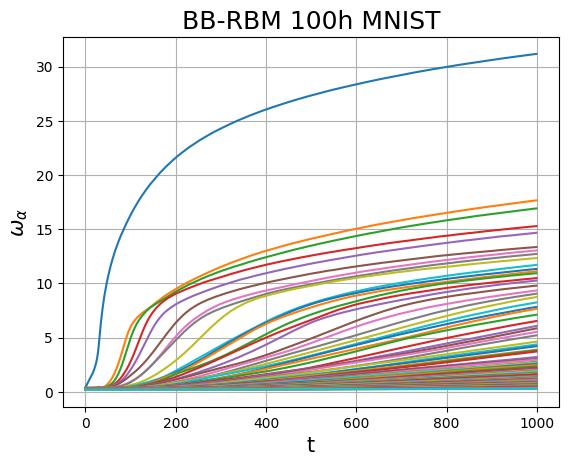

In [25]:
for i in range(n_h):
    plt.plot(s_hist.T[i], label=str(i))
# plt.legend()
plt.grid(True)
plt.ylabel(r'$\omega_{\alpha}$', fontsize=15)
plt.xlabel('t', fontsize=15)
plt.title('BB-RBM 100h MNIST', fontsize=18)
# plt.savefig('./figs/BB-RBM_100h_MNIST.jpg')

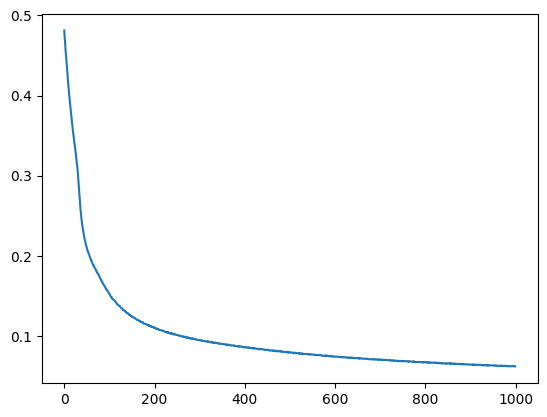

In [26]:
plt.plot(np.arange(len(model.history['loss'])), model.history['loss'])

In [ ]:
BB-RBM_100h_MNIST